In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import math 
import numpy as np
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from GetData import *

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

Set parameters for graphs:

In [13]:
len(confident[(confident["group"] != "O1")])

90

In [14]:
O3_mass_val = "chirp_mass"
mass_val_name = "Chirp Mass"

O3_colormap = plt.colormaps["coolwarm"] #LinearSegmentedColormap.from_list("O3cmap", ["skyblue", "dodgerblue", "purple","black"])
O4_colormap = plt.colormaps["coolwarm"] #LinearSegmentedColormap.from_list("O4cmap", ["gold","orange","darkred"])

fit_O3 = confident[(confident["group"] != "O1") & (confident["mass2"] > 2.16) & (confident["snr"] > 5) & (confident["luminosity_distance"] < 8000)]#[(O3_BBH["chirp_mass_source"] != 47.5)]#[(O3_BBH["total_mass"] < 130)]# & (O3_BBH["total_mass"] != 63.30)]
sub_O3 = confident[(confident["group"] != "O1") & (confident["mass2"] > 2.16) & (confident["snr"] > 5) & (confident["luminosity_distance"] < 8000)]#[(O3_BBH["chirp_mass_source"] != 47.5)] #& (O3_BBH["chirp_mass_source"] != 7.49)]
sub_O4 = O4_BBH[(O4_BBH["snr"] > 5)]# & (O4_BBH["chirp_mass"] < 140)]

include_greater_then_tick = True

O3_colormap_range = (min(sub_O4[O3_mass_val]), 70)
O4_colormap_range = (min(sub_O4[O3_mass_val]), 70)

O4_SNR_scale_factor = 1.6

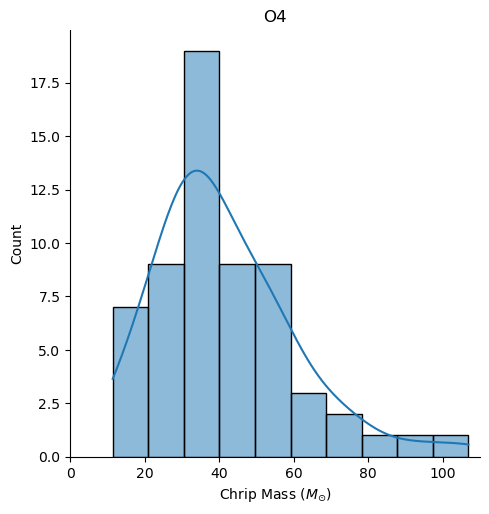

In [15]:
sns.displot(sub_O4, x="chirp_mass", kde=True)
plt.xlabel("Chrip Mass ($M_{\odot}$)")
plt.title("O4")
plt.xlim(0, 110)
plt.show()

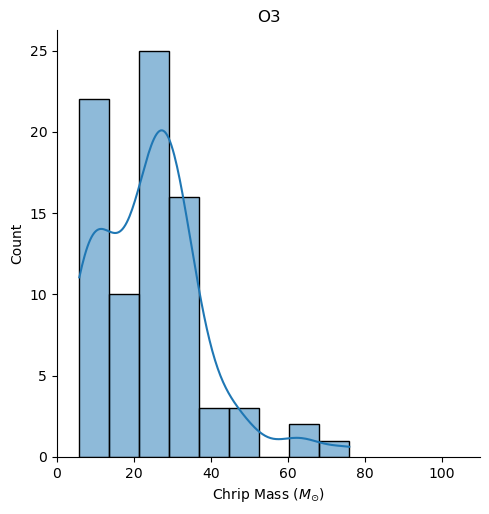

In [16]:
sns.displot(sub_O3, x="chirp_mass", kde=True)
plt.xlabel("Chrip Mass ($M_{\odot}$)")
plt.title("O3")
plt.xlim(0, 110)
plt.show()

$O3_{SNR}=cO4_{SNR}$

In [17]:
plot_sub_O3 = sub_O3
include_fit = False
include_colorbar = True
include_errorbar = True
scale = "log"

title = ""
x_label = "$D_L$ (Parsec)"
y_label = "Signal To Noise Ratio"

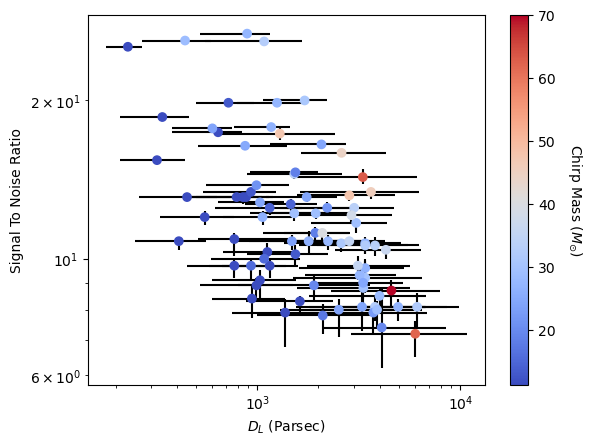

In [18]:
sc = plt.scatter(
    plot_sub_O3["luminosity_distance"],
    plot_sub_O3["snr"],
    c = plot_sub_O3[O3_mass_val],
    cmap=O3_colormap,
    vmin=O3_colormap_range[0],
    vmax=O3_colormap_range[1],
    zorder=1
    )

if include_errorbar:
    plt.errorbar(
        plot_sub_O3["luminosity_distance"],
        plot_sub_O3["snr"],
        yerr=np.array([abs(plot_sub_O3["network_matched_filter_snr_lower"].to_numpy()), plot_sub_O3["network_matched_filter_snr_upper"].to_numpy()]),
        xerr=np.array([abs(plot_sub_O3["luminosity_distance_lower"].to_numpy()), plot_sub_O3["luminosity_distance_upper"].to_numpy()]),
        fmt=".",
        ecolor='black',
        zorder=0
        )

if include_colorbar:
    cbar = plt.colorbar(sc)
    cbar.ax.get_yaxis().labelpad = 20
    cbar.ax.set_ylabel(f"{mass_val_name} " + "($M_{\odot}$)", rotation=270)

if include_fit:
    coefficients = np.polyfit(plot_sub_O3["luminosity_distance"], plot_sub_O3["network_matched_filter_snr"], 2)
    fit_line_O3_BBH = np.poly1d(coefficients)
    x = np.linspace(min(plot_sub_O3["luminosity_distance"]) * 0.8, max(plot_sub_O3["luminosity_distance"]) * 1.25, 100)
    plt.plot(x, fit_line_O3_BBH(x), linestyle="--", color="black")

if title is not None:
    plt.title(title)
plt.yscale(scale) 
plt.xscale(scale) 
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

In [19]:
plot_sub_O3 = fit_O3
include_colorbar = False
scale = "log"

linspace_range = (1, 5)

title = ""
x_label = "Chirp Mass ($M_{\odot}$)"
y_label = "SNR $\\times$ $D_L$"

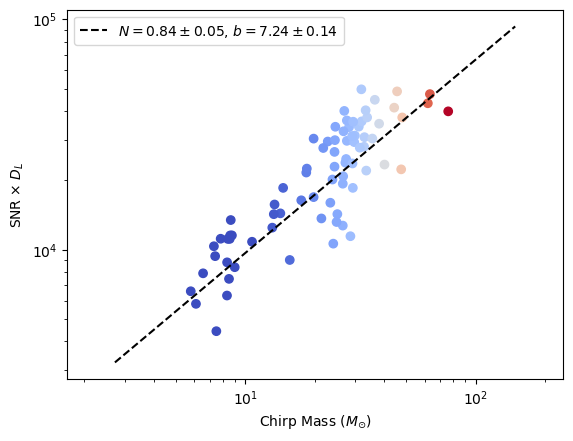

In [26]:
plot_sub_O3 = plot_sub_O3[~np.isnan(plot_sub_O3["network_matched_filter_snr_upper"] - plot_sub_O3["network_matched_filter_snr_lower"])]

sc = plt.scatter(plot_sub_O3[O3_mass_val], plot_sub_O3["luminosity_distance"] * plot_sub_O3["network_matched_filter_snr"], c = plot_sub_O3[O3_mass_val], cmap=O3_colormap, vmin=O3_colormap_range[0], vmax=O3_colormap_range[1])

s_DL = (plot_sub_O3["luminosity_distance_upper"] - plot_sub_O3["luminosity_distance_lower"]) / 2
s_SNR = (plot_sub_O3["network_matched_filter_snr_upper"] - plot_sub_O3["network_matched_filter_snr_lower"]) / 2
DL_times_SNR = plot_sub_O3["luminosity_distance"] * plot_sub_O3["network_matched_filter_snr"]
s_DL_times_SNR = np.sqrt((s_SNR*plot_sub_O3["luminosity_distance"])**2 + (s_DL*plot_sub_O3["network_matched_filter_snr"])**2)
s_log_DL_times_SNR = s_DL_times_SNR / DL_times_SNR

coefficients, cov = np.polyfit(np.log(plot_sub_O3[O3_mass_val]), np.log(plot_sub_O3["luminosity_distance"] * plot_sub_O3["network_matched_filter_snr"]), 1, cov=True, w=1/(s_log_DL_times_SNR ** 2))
m_DL, b_DL = coefficients
s_m_DL = np.sqrt(np.diag(cov))[0]
s_b_DL = np.sqrt(np.diag(cov))[1]
fit_line_O3_BBH = np.poly1d(coefficients)
x = np.linspace(linspace_range[0], linspace_range[1], 2)
plt.plot(np.e ** x, np.e ** fit_line_O3_BBH(x), color="black", linestyle="--", label=f"$N={m_DL:.2f}\pm{s_m_DL:.2f}$, $b={b_DL:.2f}\pm{s_b_DL:.2f}$")

if include_colorbar:
    cbar = plt.colorbar(sc)
    cbar.ax.get_yaxis().labelpad = 20
    cbar.ax.set_ylabel(f"{mass_val_name} " + "($M_{\odot}$)", rotation=270)

if title is not None:
    plt.title(title)

plt.legend()
plt.yscale(scale)
plt.xscale(scale)
plt.axis('equal')
plt.ylabel(y_label)
plt.xlabel(x_label)
plt.show()

In [ ]:
plot_sub_O3 = sub_O3
include_colorbar = False
include_r2score = True
scale = "log"

linspace_range = (5.1, 9.1)

title = ""
x_label = "Predicted $D_L$"
y_label = "Actual $D_L$"

In [ ]:
predicted_luminosity_distances = m_DL * np.log(plot_sub_O3[O3_mass_val]) - np.log(plot_sub_O3["network_matched_filter_snr"]) + b_DL
residuals = np.log(plot_sub_O3["luminosity_distance"]) - predicted_luminosity_distances
x = np.e ** np.linspace(linspace_range[0], linspace_range[1], 2)

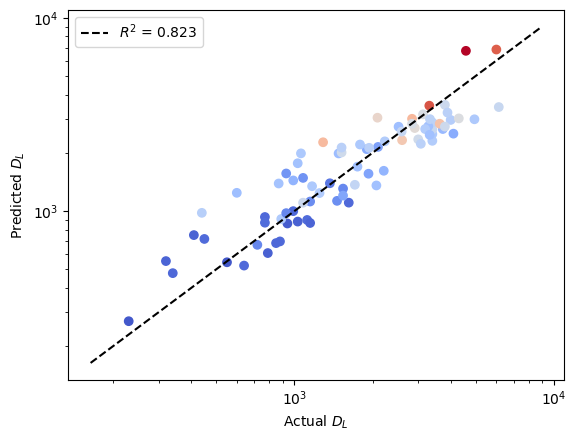

In [ ]:
sc = plt.scatter(plot_sub_O3["luminosity_distance"], np.e ** predicted_luminosity_distances, c = plot_sub_O3[O3_mass_val], cmap=O3_colormap, vmin=O3_colormap_range[0], vmax=O3_colormap_range[1])

plt.plot(x, x, color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(plot_sub_O3["luminosity_distance"]), predicted_luminosity_distances)))

if include_colorbar:
    cbar = plt.colorbar(sc)
    cbar.ax.get_yaxis().labelpad = 20
    cbar.ax.set_ylabel(f"{mass_val_name} " + "($M_{\odot}$)", rotation=270)

if include_r2score:
    plt.legend()

if title is not None:
    plt.title(title)

plt.ylabel(x_label)
plt.yscale(scale)
plt.xlabel(y_label)
plt.xscale(scale)
plt.show()

In [ ]:
include_colorbar = True
include_r2score = True
include_errorbar = False

title = None
x_label = "Actual $D_L$"
y_label = "Residuals"

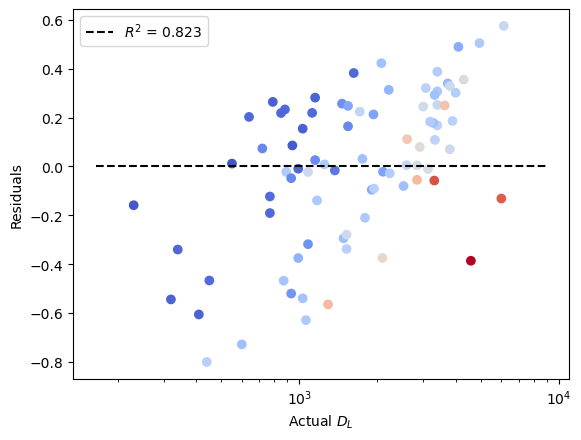

In [ ]:
plt.plot(x,np.zeros(2), color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(plot_sub_O3["luminosity_distance"]), predicted_luminosity_distances)))
plt.scatter(plot_sub_O3["luminosity_distance"], residuals, c = plot_sub_O3[O3_mass_val], cmap=O3_colormap, vmin=O3_colormap_range[0], vmax=O3_colormap_range[1], zorder=1)

if include_errorbar:
    plt.errorbar(
        plot_sub_O3["luminosity_distance"],
        residuals,
        yerr=1/np.sqrt(np.array([abs(plot_sub_O3["luminosity_distance_lower"].to_numpy()), plot_sub_O3["luminosity_distance_upper"].to_numpy()])),
        fmt=".",
        ecolor='black',
        zorder=0
        )

if include_colorbar:
    cbar = plt.colorbar(sc)
    cbar.ax.get_yaxis().labelpad = 20
    cbar.ax.set_ylabel(f"{mass_val_name} " + "($M_{\odot}$)", rotation=270)

if include_r2score:
    plt.legend()

if title is not None:
    plt.title(title)

plt.ylabel(y_label)
plt.xlabel(x_label)
plt.xscale(scale)
plt.show()

In [ ]:
x_var = "luminosity_distance"

include_colorbar = True

bins = 7

include_r2score = False

title = None
x_label = "$D_L$ (Parsecs)"
y_label = "Residuals"

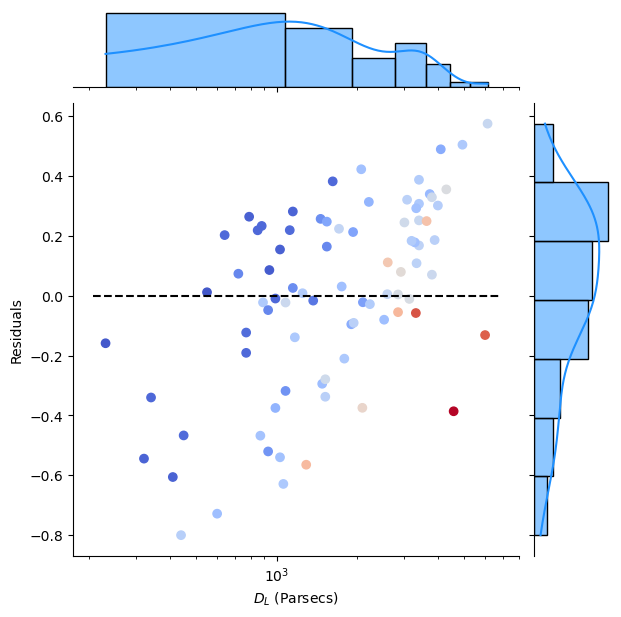

In [ ]:
g = sns.JointGrid()
g.plot_marginals(sns.histplot, kde=True, bins=bins)

sns.histplot(x=plot_sub_O3[x_var], color="dodgerblue", kde=True, bins=bins, ax=g.ax_marg_x)

sns.histplot(y=residuals, color="dodgerblue", kde=True, bins=bins, ax=g.ax_marg_y)

g.ax_joint.plot([min(plot_sub_O3[x_var]) * 0.9, max(plot_sub_O3[x_var]) * 1.1],np.zeros(2), color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(plot_sub_O3["luminosity_distance"]), predicted_luminosity_distances)))

sc = g.ax_joint.scatter(plot_sub_O3[x_var], residuals, c=plot_sub_O3[O3_mass_val], cmap=O3_colormap, vmin=O3_colormap_range[0], vmax=O3_colormap_range[1])

if include_r2score:
    g.ax_joint.legend()

if title is not None:
    g.ax_joint.set_title(title)

g.ax_joint.set_ylabel(y_label)
g.ax_joint.set_xlabel(x_label)
g.ax_joint.set_xscale(scale)
plt.show()

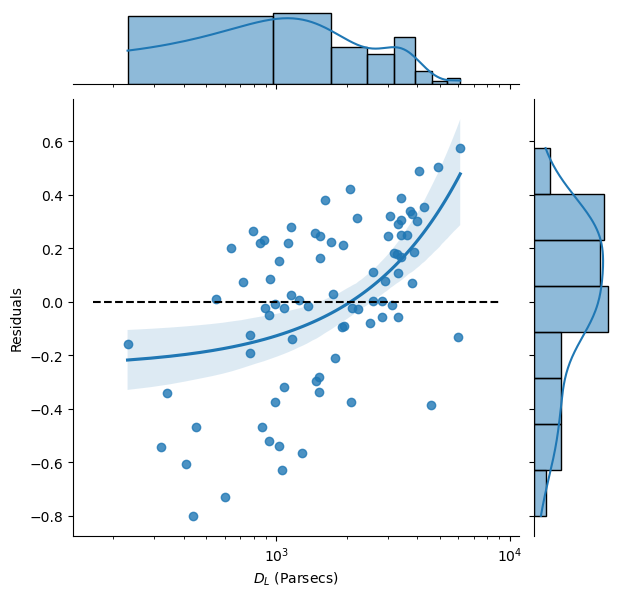

In [ ]:
g = sns.jointplot(x=plot_sub_O3["luminosity_distance"], y=residuals, kind="reg")

g.ax_joint.plot(x,np.zeros(2), color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(plot_sub_O3["luminosity_distance"]), predicted_luminosity_distances)))

if title is not None:
    g.ax_joint.set_title(title)

g.ax_joint.set_ylabel("Residuals")
g.ax_joint.set_xlabel(x_label)
g.ax_joint.set_xscale("log")
plt.show()

In [ ]:
include_colorbar = True
include_errorbar = False

bins = 7

include_r2score = False

title = None
x_label = "Actual $D_L$"
y_label = "Residuals"

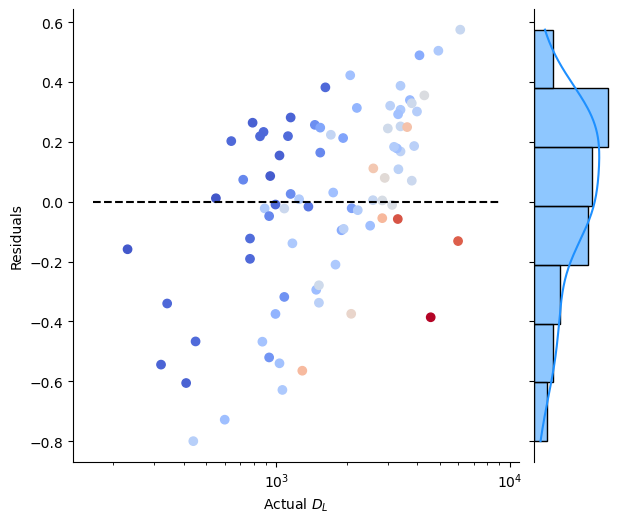

In [ ]:
g = sns.JointGrid()
g.plot_marginals(sns.histplot, kde=True, bins=bins)

g.ax_marg_x.remove()

sns.histplot(y=residuals, color="dodgerblue", kde=True, bins=bins, ax=g.ax_marg_y)

g.ax_joint.plot(x,np.zeros(2), color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(plot_sub_O3["luminosity_distance"]), predicted_luminosity_distances)))

sc = g.ax_joint.scatter(plot_sub_O3["luminosity_distance"], residuals, c=plot_sub_O3[O3_mass_val], cmap=O3_colormap, vmin=O3_colormap_range[0], vmax=O3_colormap_range[1])

if include_errorbar:
    g.ax_joint.errorbar(
        plot_sub_O3["luminosity_distance"],
        residuals,
        yerr=np.array([abs(plot_sub_O3["luminosity_distance_lower"].to_numpy()), plot_sub_O3["luminosity_distance_upper"].to_numpy()]),
        fmt=".",
        ecolor='black',
        zorder=0
        )

if include_r2score:
    g.ax_joint.legend()

if title is not None:
    g.ax_joint.set_title(title)
    
g.ax_joint.set_ylabel(y_label)
g.ax_joint.set_xlabel(x_label)
g.ax_joint.set_xscale("log")
plt.show()

In [ ]:
plot_sub_O3 = sub_O3
plot_sub_O4 = sub_O4
include_O3_colorbar = True
include_O4_colorbar = True

include_O3_colorbar_ticks = False
include_O3_colorbar_label = False
include_O3_greater_then_tick = include_greater_then_tick
include_O4_colorbar_ticks = include_greater_then_tick

y_scale = "linear"
x_scale = "linear"

title = None
x_label = "$D_L$ (Parsec)"
y_label = "Signal to Noise Ratio"

In [ ]:
def predict_luminosity_distance(df, m, b, c):
    return (np.e ** b) * (df[O3_mass_val] ** m) / (c * df['snr'])

predicted_O4_luminosity_distances = predict_luminosity_distance(plot_sub_O4, m_DL, b_DL, O4_SNR_scale_factor)

O4_ticks = list(range(int(O4_colormap_range[0] - O4_colormap_range[0] % 10), int(O4_colormap_range[1] + 1), 10))
O3_ticks = list(range(int(O4_colormap_range[0] - O4_colormap_range[0] % 10), int(O4_colormap_range[1] + 1), 10))

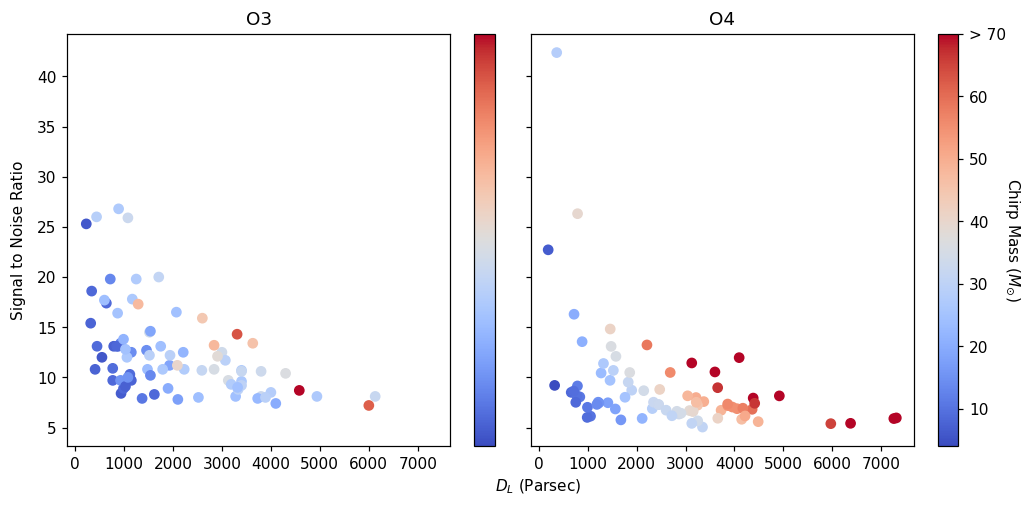

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=110, sharex=True, sharey=True)
fig.add_subplot(111, frameon=False)

sc = ax1.scatter(plot_sub_O3["luminosity_distance"], plot_sub_O3["snr"], c = plot_sub_O3[O3_mass_val], cmap=O3_colormap, vmin=O3_colormap_range[0], vmax=O3_colormap_range[1])
ax1.set_title("O3")
ax1.set_xscale(x_scale)

if include_O3_colorbar:
    cbar1 = None
    if include_O3_colorbar_ticks:
        cbar1 = plt.colorbar(sc, ax=ax1, ticks=O3_ticks)
        if include_O3_greater_then_tick:
            cbar1.ax.set_yticklabels([str(t) for t in O3_ticks[0:-1]] + [f"> {O3_ticks[-1]}"])
    else:
        cbar1 = plt.colorbar(sc, ax=ax1)
        cbar1.set_ticks([])
    if include_O3_colorbar_label:
        cbar1.ax.get_yaxis().labelpad = 10
        cbar1.ax.set_ylabel(f"{mass_val_name} " + "($M_{\odot}$)", rotation=270)

sc = ax2.scatter(predicted_O4_luminosity_distances, plot_sub_O4["snr"], c = plot_sub_O4[O3_mass_val], cmap=O4_colormap, vmin=O4_colormap_range[0], vmax=O4_colormap_range[1])

ax2.set_title("O4")
ax2.set_xscale(x_scale)

if include_O4_colorbar:
    cbar2 = None
    if include_O4_colorbar_ticks:
        cbar2 = plt.colorbar(sc, ax=ax2, ticks=O4_ticks)
        if include_greater_then_tick:
            cbar2.ax.set_yticklabels([str(t) for t in O4_ticks[0:-1]] + [f"> {O4_ticks[-1]}"])
    else:
        cbar2 = plt.colorbar(sc, ax=ax2)
    cbar2.ax.get_yaxis().labelpad = 10
    cbar2.ax.set_ylabel(f"{mass_val_name} " + "($M_{\odot}$)", rotation=270)
    plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

plt.yscale(y_scale)

plt.xlabel(x_label)
plt.ylabel(y_label)

if title is not None:
    plt.title(title)

plt.tight_layout()
plt.show()

In [ ]:
include_O3_colorbar = True
include_O4_colorbar = True
include_O4_colorbar_ticks = include_greater_then_tick

y_scale = "linear"
x_scale = "log"

title = None
x_label = "$D_L$ (Parsec)"
y_label = "Signal to Noise Ratio"

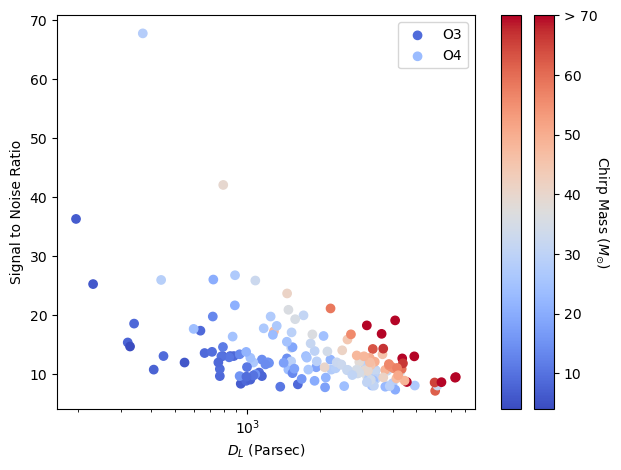

In [ ]:
sc1 = plt.scatter(plot_sub_O3["luminosity_distance"], plot_sub_O3["snr"], c = plot_sub_O3[O3_mass_val], cmap=O3_colormap, vmin=O3_colormap_range[0], vmax=O3_colormap_range[1], label="O3")

sc2 = plt.scatter(predicted_O4_luminosity_distances, plot_sub_O4["snr"] * O4_SNR_scale_factor, c = plot_sub_O4[O3_mass_val], cmap=O4_colormap, vmin=O4_colormap_range[0], vmax=O4_colormap_range[1], label="O4")
if include_O4_colorbar:
    cbar2 = None
    if include_O4_colorbar_ticks:
        if include_O3_colorbar:
            cbar2 = plt.colorbar(sc2, ticks=O4_ticks, pad=-0.08)
        else:
            cbar2 = plt.colorbar(sc2, ticks=O4_ticks)
        cbar2.ax.set_yticklabels([str(t) for t in O4_ticks[0:-1]] + [f"> {O4_ticks[-1]}"])
    else:
        if include_O3_colorbar:
            cbar2 = plt.colorbar(sc2, pad=-0.08)
        else:
            cbar2 = plt.colorbar(sc2)
    cbar2.ax.get_yaxis().labelpad = 10
    cbar2.ax.set_ylabel(f"{mass_val_name} " + "($M_{\odot}$)", rotation=270)
if include_O3_colorbar:
    cbar1 = plt.colorbar(sc1)
    cbar1.set_ticks([])

plt.xscale(x_scale)
plt.yscale(y_scale)

plt.legend()
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.tight_layout()
plt.show()